# NBA Trends

This data was originally sourced from 538's analysis of the complete history of the NBA. 538 is a statistics journalism organization that does a lot of work on specifically Sports and politics.

# Importing Essential Libraries

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
np.set_printoptions(precision= 2, suppress= True)
# np.set_printoptions allows you to customize how arrays and other NumPy objects are displayed when printed
# precision: Sets the number of digits of precision for floating-point numbers
# suppress: Suppresses scientific notation for small floating-point values

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency

In [2]:
nba = pd.read_csv("/kaggle/input/fivethirtyeight-nba-elo-dataset/nbaallelo.csv")
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


# EDA (Exploratory Data Analysis)

In [3]:
# Choosing the columns for our analysis
columns_to_drop = ['gameorder', 'lg_id', '_iscopy', 'date_game', 'seasongame', 'team_id', 'elo_i', 'elo_n', 'win_equiv',
                   'opp_id', 'opp_elo_i', 'opp_elo_n', 'notes']

nba.drop(columns_to_drop, axis=1, inplace=True)
nba

,game_id,year_id,is_playoffs,fran_id,pts,opp_fran,opp_pts,game_location,game_result,forecast
0,194611010TRH,1947,0,Huskies,66,Knicks,68,H,L,0.640065
1,194611010TRH,1947,0,Knicks,68,Huskies,66,A,W,0.359935
2,194611020CHS,1947,0,Stags,63,Knicks,47,H,W,0.631101
3,194611020CHS,1947,0,Knicks,47,Stags,63,A,L,0.368899
4,194611020DTF,1947,0,Falcons,33,Capitols,50,H,L,0.640065
...,...,...,...,...,...,...,...,...,...,...
126309,201506110CLE,2015,1,Cavaliers,82,Warriors,103,H,L,0.546572
126310,201506140GSW,2015,1,Warriors,104,Cavaliers,91,H,W,0.765565
126311,201506140GSW,2015,1,Cavaliers,91,Warriors,104,A,L,0.234435
126312,201506170CLE,2015,1,Cavaliers,97,Warriors,105,H,L,0.481450


In [4]:
# Adding a Point difference column for better analysis and understanding
nba['point_diff'] = nba['pts'] - nba['opp_pts']
nba

,game_id,year_id,is_playoffs,fran_id,pts,opp_fran,opp_pts,game_location,game_result,forecast,point_diff
0,194611010TRH,1947,0,Huskies,66,Knicks,68,H,L,0.640065,-2
1,194611010TRH,1947,0,Knicks,68,Huskies,66,A,W,0.359935,2
2,194611020CHS,1947,0,Stags,63,Knicks,47,H,W,0.631101,16
3,194611020CHS,1947,0,Knicks,47,Stags,63,A,L,0.368899,-16
4,194611020DTF,1947,0,Falcons,33,Capitols,50,H,L,0.640065,-17
...,...,...,...,...,...,...,...,...,...,...,...
126309,201506110CLE,2015,1,Cavaliers,82,Warriors,103,H,L,0.546572,-21
126310,201506140GSW,2015,1,Warriors,104,Cavaliers,91,H,W,0.765565,13
126311,201506140GSW,2015,1,Cavaliers,91,Warriors,104,A,L,0.234435,-13
126312,201506170CLE,2015,1,Cavaliers,97,Warriors,105,H,L,0.481450,-8


In [5]:
# Re-ordering the columns for better understanding

nba = nba.loc[:, ['game_id', 'year_id', 'fran_id', 'opp_fran', 'game_location', 'is_playoffs', 'pts', 'opp_pts',
                  'game_result', 'forecast', 'point_diff']]

nba

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Huskies,Knicks,H,0,66,68,L,0.640065,-2
1,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
2,194611020CHS,1947,Stags,Knicks,H,0,63,47,W,0.631101,16
3,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
4,194611020DTF,1947,Falcons,Capitols,H,0,33,50,L,0.640065,-17
...,...,...,...,...,...,...,...,...,...,...,...
126309,201506110CLE,2015,Cavaliers,Warriors,H,1,82,103,L,0.546572,-21
126310,201506140GSW,2015,Warriors,Cavaliers,H,1,104,91,W,0.765565,13
126311,201506140GSW,2015,Cavaliers,Warriors,A,1,91,104,L,0.234435,-13
126312,201506170CLE,2015,Cavaliers,Warriors,H,1,97,105,L,0.481450,-8


In [6]:
# Checking Subset data of 2010 Season and 2014 Season

nba_2010 = nba[nba['year_id'] == 2010] # Method of Bracket Notation

nba_2014 = nba[nba.year_id == 2014] # Another way of writing same code but not usable if column name has space between two words

In [7]:
nba_2010

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
111032,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
111033,200910270CLE,2010,Cavaliers,Celtics,H,0,89,95,L,0.722528,-6
111034,200910270DAL,2010,Wizards,Mavericks,A,0,102,91,W,0.133436,11
111035,200910270DAL,2010,Mavericks,Wizards,H,0,91,102,L,0.866564,-11
111036,200910270LAL,2010,Clippers,Lakers,A,0,92,99,L,0.052993,-7
...,...,...,...,...,...,...,...,...,...,...,...
113651,201006130BOS,2010,Celtics,Lakers,H,1,92,86,W,0.627127,6
113652,201006150LAL,2010,Celtics,Lakers,A,1,67,89,L,0.361360,-22
113653,201006150LAL,2010,Lakers,Celtics,H,1,89,67,W,0.638640,22
113654,201006170LAL,2010,Lakers,Celtics,H,1,83,79,W,0.669180,4


In [8]:
nba_2014

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
121054,201310290IND,2014,Magic,Pacers,A,0,87,97,L,0.106039,-10
121055,201310290IND,2014,Pacers,Magic,H,0,97,87,W,0.893961,10
121056,201310290LAL,2014,Lakers,Clippers,H,0,116,103,W,0.535102,13
121057,201310290LAL,2014,Clippers,Lakers,A,0,103,116,L,0.464898,-13
121058,201310290MIA,2014,Bulls,Heat,A,0,95,107,L,0.172841,-12
...,...,...,...,...,...,...,...,...,...,...,...
123687,201406100MIA,2014,Heat,Spurs,H,1,92,111,L,0.520025,-19
123688,201406120MIA,2014,Heat,Spurs,H,1,86,107,L,0.472210,-21
123689,201406120MIA,2014,Spurs,Heat,A,1,107,86,W,0.527790,21
123690,201406150SAS,2014,Spurs,Heat,H,1,104,87,W,0.809078,17


# Analyzing relationships between Numerical and Categorical

In [9]:
knicks_pts_10 = nba_2010[nba_2010.fran_id == 'Knicks']['pts']
nets_pts_10 = nba_2010[nba_2010.fran_id == 'Nets']['pts']

In [10]:
# Checking the Means of two diff teams
diff_means_2010 = knicks_pts_10.mean() - nets_pts_10.mean()
diff_means_2010

9.731707317073173

By checking the difference between means of two teams is there any association between the "fran_id" and "pts" ?
Maybe or Maybe not. Lets check furthur and do more analysis by Visualizing the data in graphs

Text(0.5, 1.0, '2010 Season')

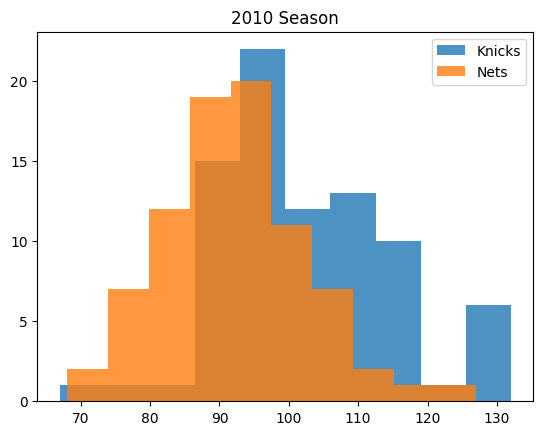

In [11]:
plt.hist(knicks_pts_10, alpha= 0.8, label= 'Knicks')
plt.hist(nets_pts_10, alpha= 0.8, label= 'Nets')
plt.legend()
plt.title('2010 Season')

We can see that the Knicks and Nets have certain points which are not overlapping and thus we can say that they are not associated with each other

0.44706798131809933


Text(0.5, 1.0, '2014 Season')

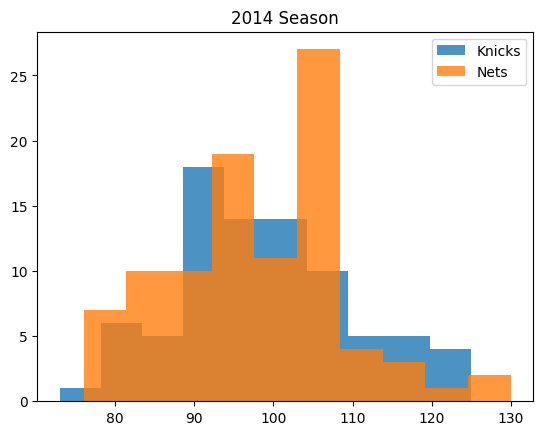

In [12]:
# Lets compare the 2010 season to 2014 season and check the association

knicks_pts_14 = nba_2014[nba_2014.fran_id == 'Knicks']['pts']
nets_pts_14 = nba_2014[nba_2014.fran_id == 'Nets']['pts']

# Checking the Means of two diff teams

diff_means_2014 = knicks_pts_14.mean() - nets_pts_14.mean()
print(diff_means_2014)

plt.hist(knicks_pts_14, alpha= 0.8, label= 'Knicks')
plt.hist(nets_pts_14, alpha= 0.8, label= 'Nets')
plt.legend()
plt.title('2014 Season')

As there are a lot of points overlapping we can say that the Knicks and Nets are associated with each other in 2014 

<Axes: xlabel='pts', ylabel='fran_id'>

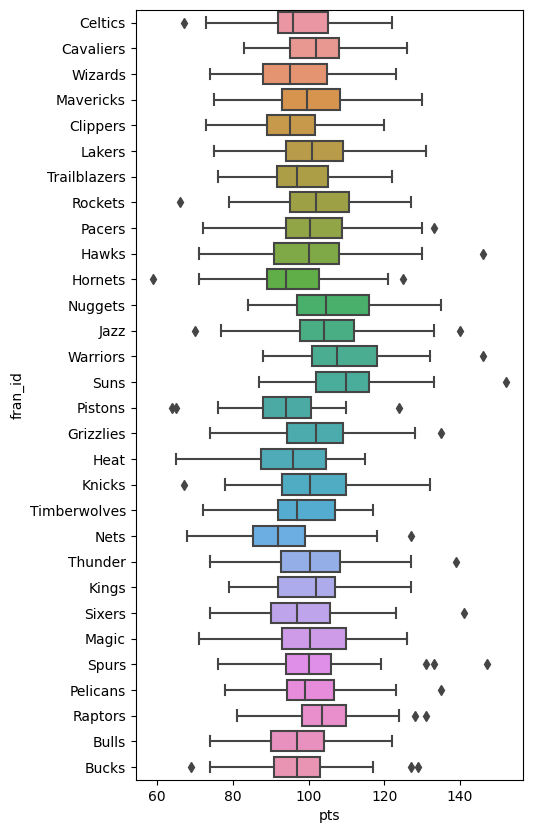

In [13]:
# Lets check the NBA 2010 data and the relationship between all the teams
plt.figure(figsize= (5, 10))
sns.boxplot(data= nba_2010, y= 'fran_id', x= 'pts')

We can see that the Nets are doing poorly compared to everyone else

# Analyzing the Relationship between the Categorical variable

Lets check if the teams score more when they are at Home or when they are Away.
Teams tend to win more games at Home compared to Away might due to reasons like chearleading effect. Maybe it helps them to boost their morale or play with pride etc when they are at Home. Lets check it out

In [14]:
loc_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
loc_result_freq

game_location,A,H
game_result,,
L,786,526
W,526,786


So it looks like they win more times when they are at home than when they are away.
But this table still does not tell accurate details. You have to look closely to make an assumption about win results
Lets do something about this

In [15]:
loc_result_proportion = loc_result_freq / len(nba_2010)

loc_result_proportion

game_location,A,H
game_result,,
L,0.299543,0.200457
W,0.200457,0.299543


So it looks like they win almost 30% times when teams are at Home. Still we can not totally assume there is an association there.

Lets check the Chi^2 test.
Chi^2 or chi-square test is a statistical test that determine if there is an association between the categorical variable

In [16]:
chi2, pval, dof, expected = chi2_contingency(loc_result_freq)
# chi2 value: strength of the association
# pval: probability or point of degrees to which it is statistically significant
# dof: Determines the number of independent pieces of information used in the calculation
# Expected frequencies: The frequencies that would be expected in each cell if the variables were independent

print(chi2)
print(expected)

102.2576219512195
[[656. 656.]
 [656. 656.]]


A larger chi-squared value generally indicates a stronger association.

# Analyzing relationship between Numerical variables

Lets check if teams with a higher probability of winning also tends to win the game by more points

In [17]:
pointdiff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)

pointdiff_forecast_cov

array([[184.17,   1.4 ],
       [  1.4 ,   0.05]])

There is a high covariance between the "point_diff" and "forecast" columns. i.e. the teams having high chance of winning also has high probability of winning by more points

In [18]:
# Lets test this statistic by using pearsonr test
pointdiff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
# Pearsonr test is a way to test the association between two numerical variables

pointdiff_forecast_corr

PearsonRResult(statistic=0.45800446272798073, pvalue=3.0713167930112876e-136)

We can see that the forecast statistic is about 0.46 and the pvalue: degree to which it is statistically significant is 3.07 * 10^-136.
This means that there is a strong association between forecast and point_diff columns and it is likely positive association

* 0: no association and
* 1: very strong positive association

So it looks like there is an association here and the degree to which we are confident is very very high.

Text(0, 0.5, 'Forecasted Win Probablities')

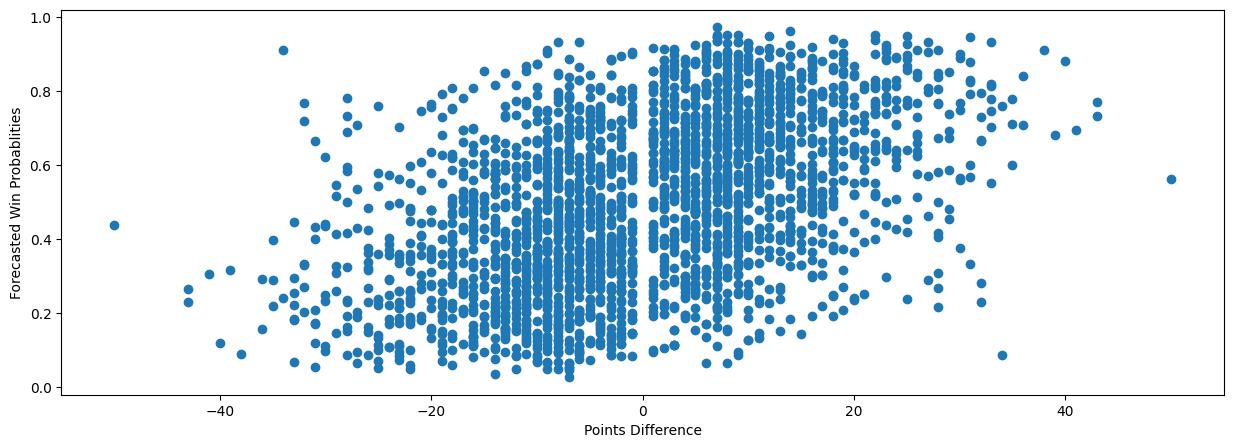

In [19]:
# Lets visualise
plt.figure(figsize= (15, 5))
plt.scatter(data= nba_2010, x= 'point_diff', y='forecast')
plt.xlabel('Points Difference')
plt.ylabel('Forecasted Win Probablities')